In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [2]:
tf.test.is_gpu_available()

True

In [3]:
batchsize = 16

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 0.2, shear_range = 0.2, zoom_range = 0.2, width_shift_range =0.2, height_shift_range = 0.2, validation_split = 0.2)

In [5]:
train_data = train_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\train',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical', subset = 'training')

validation_data = train_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\train',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical', subset = 'validation')

Found 61497 images belonging to 2 classes.
Found 15373 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\test',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical')

Found 8028 images belonging to 2 classes.


In [7]:
bmodel = MobileNet(include_top = False, weights = 'imagenet', input_tensor = Input(shape = (80,80,3), batch_size = batchsize))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

C:\Users\sandi\anaconda3\envs\myenv\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 9s 1us/step


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(16, 80, 80, 3)]         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (16, 81, 81, 3)           0         
_________________________________________________________________
conv1 (Conv2D)               (16, 40, 40, 32)          864       
_________________________________________________________________
conv1_bn (BatchNormalization (16, 40, 40, 32)          128       
_________________________________________________________________
conv1_relu (ReLU)            (16, 40, 40, 32)          0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (16, 40, 40, 32)          288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (16, 40, 40, 32)          128   

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [10]:
checkpoint = ModelCheckpoint(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5',
                            monitor = 'val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 3)

callbacks = [checkpoint,earlystop,learning_rate]

In [11]:
from PIL.Image import core as _imaging

In [12]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,epochs=10)

Epoch 1/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.8947
Epoch 00001: val_loss improved from inf to 0.55475, saving model to D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5
3843/3843 [==============================] - 1807s 470ms/step - loss: 0.2639 - accuracy: 0.8947 - val_loss: 0.5548 - val_accuracy: 0.6389
Epoch 2/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9092
Epoch 00002: val_loss did not improve from 0.55475
3843/3843 [==============================] - 1403s 365ms/step - loss: 0.2279 - accuracy: 0.9092 - val_loss: 0.5642 - val_accuracy: 0.6635
Epoch 3/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.2152 - accuracy: 0.9150
Epoch 00003: val_loss did not improve from 0.55475
3843/3843 [==============================] - 1391s 362ms/step - loss: 0.2152 - accuracy: 0.9150 - val_loss: 0.5576 - val_accuracy: 0.7035
Epoch 4/10
3842/3843 [=======================

In [13]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

0.550387659644113
0.7024408


In [14]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

0.5539603974829107
0.69713134


In [15]:
acc_test, loss_test = model.evaluate_generator(test_data)
print(acc_test)
print(loss_test)

0.49449096216386057
0.7563528


In [16]:
import matplotlib.pyplot as plt

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [18]:
history.history

{'loss': [0.26389986028718243,
  0.22789696372380258,
  0.21519729449355685,
  0.21424896315662884,
  0.21310302958967814,
  0.2077964273858403,
  0.20383306498596582,
  0.18227305499979587,
  0.1798934500434039,
  0.17575320331947675],
 'accuracy': [0.894748,
  0.90924025,
  0.9149981,
  0.9153397,
  0.91623425,
  0.91579515,
  0.9198289,
  0.9273759,
  0.9288561,
  0.93012476],
 'val_loss': [0.5547537856114407,
  0.5642475019209087,
  0.5575978439146032,
  0.5538552638453742,
  0.5576392451611658,
  0.6083930605556815,
  0.5737271090348561,
  0.5639195427919428,
  0.5509423771252234,
  0.5539082767131428],
 'val_accuracy': [0.6389323,
  0.6634766,
  0.7034505,
  0.7097005,
  0.6950521,
  0.653125,
  0.68183595,
  0.6886068,
  0.68828124,
  0.6955078],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.000100000005,
  0.000100000005,
  0.000100000005]}

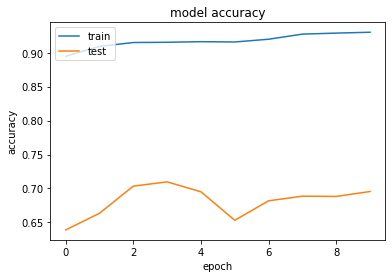

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

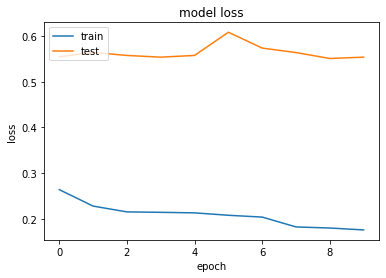

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [21]:
import pandas as pd

<AxesSubplot:>

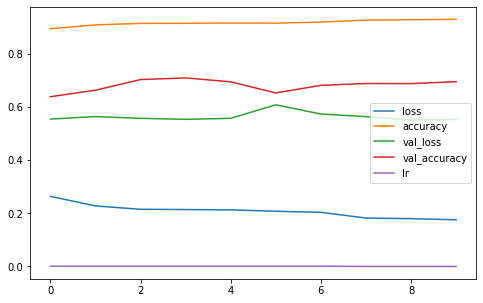

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))